# NOTE
The material in this notebook is strongly influenced by a linear algebra tutorial by Aurelien Geron that can be found here:

https://github.com/ageron/handson-ml/blob/master/math_linear_algebra.ipynb

# Matrices with Python
First, NumPy and Matplotlib need to be imported. Matplotlib needs to be made inline for the notebook, and seaborn needs to be imported to make the plots look prettier.

Note that the 3D toolkit of Matplotlib is being imported.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import numpy.linalg as la

As in the vectors notebook, seaborn will be used to pretty up any plots.

In [2]:
sns.set(style='whitegrid', palette='muted', font='roboto')
sns.set_context('talk')

Most matrices used throughout this notebook will now be defined. They are as follows:
- A: square matrix in $\rm I\!R^3$
- B: square matrix in $\rm I\!R^3$
- C: symmetric matrix in $\rm I\!R^3$
- D: upper triangular matrix in $\rm I\!R^3$
- E: lower triangular matrix in $\rm I\!R^3$
- F: diagonal matrix in $\rm I\!R^3$
- G: 3x2 matrix
- H: 2x3 matrix
- I: Identity matrix in $\rm I\!R^3$
- J: 5x4 matrix
- K: 4x6 matrix
- L: 2x5 matrix
- M: 6x1 matrix
- N: 2x5 matrix

In [3]:
A = np.array([
    [2,4,1],
    [6,4,3],
    [4,1,2],
])
B = np.array([
    [7,5,2],
    [0,1,0],
    [5,5,5],
])
C = np.array([
    [4,6,9],
    [6,5,2],
    [8,2,3],
])
D = np.array([
    [4,5,7],
    [0,5,1],
    [0,0,3],
])
E = np.array([
    [4,0,0],
    [6,2,0],
    [4,2,3],
])
F = np.array([
    [4,0,0],
    [0,7,0],
    [0,0,3],
])
G = np.array([
    [2,2],
    [3,1],
    [6,3],
])
H = np.array([
    [7,5,3],
    [2,1,3],
])
I = np.eye(3)
J = np.array([
    [4,3,2,1],
    [2,4,3,5],
    [6,4,7,2],
    [1,3,5,2],
    [3,3,4,4],
])
K = np.array([
    [2,1,3,4,2,5],
    [4,3,5,6,1,2],
    [4,7,2,3,1,1],
    [3,2,5,4,6,3],
])
L = np.array([
    [4,6,2,7,6],
    [3,2,3,3,1],
])
M = np.array([
    [1],
    [5],
    [4],
    [3],
    [5],
    [9],
])
N = np.array([
    [1,0.5,0.25,-0.75,0.1],
    [0.75,-1,0.25,-0.25,-0.1],
])

In [4]:
print(f'Shape of A: {A.shape}')
print(f'Shape of J: {J.shape}')
print(f'Shape of M: {M.shape}')

Shape of A: (3, 3)
Shape of J: (5, 4)
Shape of M: (6, 1)


In [5]:
print(f'3D Square Matrix:\n{A}')

3D Square Matrix:
[[2 4 1]
 [6 4 3]
 [4 1 2]]


In [6]:
print(f'Matrix Transposition:\nNormal\n{L}\nTransposed\n{L.T}')

Matrix Transposition:
Normal
[[4 6 2 7 6]
 [3 2 3 3 1]]
Transposed
[[4 3]
 [6 2]
 [2 3]
 [7 3]
 [6 1]]


In [7]:
print(f'3D Symmetric Matrix:\nNormal\n{C}\nTransposed\n{C.T}')

3D Symmetric Matrix:
Normal
[[4 6 9]
 [6 5 2]
 [8 2 3]]
Transposed
[[4 6 8]
 [6 5 2]
 [9 2 3]]


In [8]:
print(f'3D Upper Triangular Matrix:\n{D}')
print(f'\n3D Lower Triangular Matrix:\n{E}')

3D Upper Triangular Matrix:
[[4 5 7]
 [0 5 1]
 [0 0 3]]

3D Lower Triangular Matrix:
[[4 0 0]
 [6 2 0]
 [4 2 3]]


In [9]:
print(f'3D Diagonal Matrix:\n{F}')

3D Diagonal Matrix:
[[4 0 0]
 [0 7 0]
 [0 0 3]]


In [10]:
print(f'3D Identity Matrix:\n{I}')

3D Identity Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Matrix Addition
Matrix addition can only be done with two matrices of the same size $m\times{n}$. The sum of two matrices of size $m\times{n}$ results in a third matrix of size $m\times{n}$ in which each element equals the sum of the corresponding elements in the original two matrices. So, $C_{i,j} = A_{i,j} + B_{i,j}$.

In [11]:
print(f'A:\n{A}')
print(f'B:\n{B}')
print(f'A+B:\n{A+B}')

A:
[[2 4 1]
 [6 4 3]
 [4 1 2]]
B:
[[7 5 2]
 [0 1 0]
 [5 5 5]]
A+B:
[[9 9 3]
 [6 5 3]
 [9 6 7]]


It exhibits the following properties:

In [12]:
print('Matrix of any size:')
print(f'K + K =\n{K + K}')

print('\nCommutative:')
print(f'A + B =\n{A + B}')
print(f'\nB + A =\n{B + A}')

print('\nAssociative:')
print(f'A + (B + C) =\n{A + (B + C)}')
print(f'\n(A + B) +C =\n{(A + B) + C}')

print('\nTransposition over addition is distributive:')
print(f'Transpose(A + B) =\n{(A + B).T}')
print(f'Transpose(A) + Transpose(B) =\n{A.T + B.T}')

print('\nMust belong to the same set of valued tuples:')
try:
    print(f'A + K =')
    A + K
except Exception as e:
    print(e)

Matrix of any size:
K + K =
[[ 4  2  6  8  4 10]
 [ 8  6 10 12  2  4]
 [ 8 14  4  6  2  2]
 [ 6  4 10  8 12  6]]

Commutative:
A + B =
[[9 9 3]
 [6 5 3]
 [9 6 7]]

B + A =
[[9 9 3]
 [6 5 3]
 [9 6 7]]

Associative:
A + (B + C) =
[[13 15 12]
 [12 10  5]
 [17  8 10]]

(A + B) +C =
[[13 15 12]
 [12 10  5]
 [17  8 10]]

Transposition over addition is distributive:
Transpose(A + B) =
[[9 6 9]
 [9 5 6]
 [3 3 7]]
Transpose(A) + Transpose(B) =
[[9 6 9]
 [9 5 6]
 [3 3 7]]

Must belong to the same set of valued tuples:
A + K =
operands could not be broadcast together with shapes (3,3) (4,6) 


## Matrix Multiplication
There are two primary ways in which matrices are multiplied: Scalar Multiplication and Matrix Multiplication.

### Scalar Multiplication
Multiplying a matrix by a scalar is equivalent to multiplying each element in the matrix by that same scalar.

In [13]:
scalar = 3
print(f'A:\n{A}')
print(f'\nscalar * A:\n{scalar*A}')

A:
[[2 4 1]
 [6 4 3]
 [4 1 2]]

scalar * A:
[[ 6 12  3]
 [18 12  9]
 [12  3  6]]


It exhibits the following properties:

In [14]:
print('Matrix of any size:')
print(f'{scalar} * K =\n{scalar * K}')
print(f'\n{scalar} * M =\n{scalar * M}')

print('\nCommutative:')
print(f'{scalar} * A =\n{scalar * A}')
print(f'\nA * {scalar} =\n{A * scalar}')

print('\nAssociative:')
print(f'{scalar} * ({scalar} * A) =\n{scalar * (scalar * A)}')
print(f'\n({scalar} * {scalar}) * A =\n{(scalar * scalar) * A}')

print('\nDistributive:')
print(f'{scalar} * (A + B) =\n{scalar * (A + B)}')
print(f'\n({scalar} * A) + ({scalar} * B) =\n{(scalar * A) + (scalar * B)}')

Matrix of any size:
3 * K =
[[ 6  3  9 12  6 15]
 [12  9 15 18  3  6]
 [12 21  6  9  3  3]
 [ 9  6 15 12 18  9]]

3 * M =
[[ 3]
 [15]
 [12]
 [ 9]
 [15]
 [27]]

Commutative:
3 * A =
[[ 6 12  3]
 [18 12  9]
 [12  3  6]]

A * 3 =
[[ 6 12  3]
 [18 12  9]
 [12  3  6]]

Associative:
3 * (3 * A) =
[[18 36  9]
 [54 36 27]
 [36  9 18]]

(3 * 3) * A =
[[18 36  9]
 [54 36 27]
 [36  9 18]]

Distributive:
3 * (A + B) =
[[27 27  9]
 [18 15  9]
 [27 18 21]]

(3 * A) + (3 * B) =
[[27 27  9]
 [18 15  9]
 [27 18 21]]


### Matrix Multiplication
Matrix multiplication, like matrix addition, can only be done with matrices of particular sizes. For a matrix multiplication to occur between __A__ and **B**, <b>A</b> must be of size $m\times{n}$, and <b>B</b> must be of size $n\times{k}$. The resulting matrix is of size $m\times{k}$. Each element in the resulting matrix is equal to the dot product of <b>A</b>'s row vectors $R_i$ up to $i=n$ and <b>B</b>'s column vectors $C_i$ up to $i=n$. It is better represented by:

$$
\left[\matrix{
A_{11}B_{11}+A_{12}B_{21}+\cdots +A_{1n}B_{n1} & A_{11}B_{12}+A_{12}B_{22}+\cdots +A_{1n}B_{n2} & \ldots & A_{11}B_{1k}+A_{12}B_{2k}+\cdots +A_{1n}B_{nk} \cr
A_{21}B_{11}+A_{22}B_{21}+\cdots +A_{2n}B_{n1} & A_{21}B_{12}+A_{22}B_{22}+\cdots +A_{2n}B_{n2} & \ldots & A_{21}B_{1k}+A_{22}B_{2k}+\cdots +A_{2n}B_{nk} \cr
\vdots & \vdots & \ddots & \vdots \cr
A_{m1}B_{11}+A_{m2}B_{21}+\cdots +A_{mn}B_{n1} & A_{m1}B_{12}+A_{m2}B_{22}+\cdots +A_{mn}B_{n2} & \ldots & A_{m1}B_{1k}+A_{m2}B_{2k}+\cdots +A_{mn}B_{nk}
}\right]
$$

It's much easier to understand with examples. As with vector dot products, numpy offers 2 functions for matrix multiplications, as well as the infix operator ('@') introduced in Python 3.5.

In [15]:
print(A)

[[2 4 1]
 [6 4 3]
 [4 1 2]]


In [16]:
print(B)

[[7 5 2]
 [0 1 0]
 [5 5 5]]


In [17]:
print(A@B)
print(A.dot(B))
print(np.dot(A,B))
print(np.matmul(A,B))

[[19 19  9]
 [57 49 27]
 [38 31 18]]
[[19 19  9]
 [57 49 27]
 [38 31 18]]
[[19 19  9]
 [57 49 27]
 [38 31 18]]
[[19 19  9]
 [57 49 27]
 [38 31 18]]


In [18]:
print('Element 2,1 in A multiplied by B:')
print(f'{A[1][0]*B[0][0]+A[1][1]*B[1][0]+A[1][2]*B[2][0]} == {(A@B)[1][0]}')

Element 2,1 in A multiplied by B:
57 == 57


In [19]:
print('Not Commutative:')
print(f'J * K =\n{J@K}')
try:
    print(f'K * J =')
    K@J
except Exception as e:
    print(e)

print('\nAssociative:')
print(f'J * (K * M) =\n{J @ (K @ M)}')
print(f'\n(J * K) * M =\n{(J @ K) @ M}')
    
print('\nAssociative for Scalar Multiplication:')
print(f'{scalar} * (J * K) =\n{scalar * (J @ K)}')
print(f'\n({scalar} * J) * K =\n{(scalar * J) @ K}')

print('\nDistributive for Matrix Addition:')
print(f'H * (A + B) =\n{H @ (A + B)}')
print(f'\n(H * A) + (H * B) =\n{(H @ A) + (H @ B)}')

Not Commutative:
J * K =
[[31 29 36 44 19 31]
 [47 45 57 61 41 36]
 [62 71 62 77 35 51]
 [40 49 38 45 22 22]
 [46 48 52 58 37 37]]
K * J =
shapes (4,6) and (5,4) not aligned: 6 (dim 1) != 5 (dim 0)

Associative:
J * (K * M) =
[[ 826]
 [1212]
 [1530]
 [ 880]
 [1186]]

(J * K) * M =
[[ 826]
 [1212]
 [1530]
 [ 880]
 [1186]]

Associative for Scalar Multiplication:
3 * (J * K) =
[[ 93  87 108 132  57  93]
 [141 135 171 183 123 108]
 [186 213 186 231 105 153]
 [120 147 114 135  66  66]
 [138 144 156 174 111 111]]

(3 * J) * K =
[[ 93  87 108 132  57  93]
 [141 135 171 183 123 108]
 [186 213 186 231 105 153]
 [120 147 114 135  66  66]
 [138 144 156 174 111 111]]

Distributive for Matrix Addition:
H * (A + B) =
[[120 106  57]
 [ 51  41  30]]

(H * A) + (H * B) =
[[120 106  57]
 [ 51  41  30]]


Matrix Multiplication between a matrix and its transpose is always a symmetric matrix.

In [20]:
print(L @ L.T)
print(K @ K.T)

[[141  57]
 [ 57  32]]
[[59 62 40 66]
 [62 91 68 79]
 [40 68 80 57]
 [66 79 57 99]]


Matrix multiplication with an Identity matrix results in the same matrix.

In [21]:
print(f'A:\n{A}')
print(f'\nI:\n{I}')
print(f'\nA * I:\n{A @ I}')

A:
[[2 4 1]
 [6 4 3]
 [4 1 2]]

I:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

A * I:
[[2. 4. 1.]
 [6. 4. 3.]
 [4. 1. 2.]]


## Visualizations
Now its time to visualize matrices and their properties via plotting. The visualizations covered here will be two dimensional, and the vectors used for plotting with be the column vectors of the matrices.

There are many options for plotting the matrices. Each column vector could be thought of as a separate entity, as shown below.

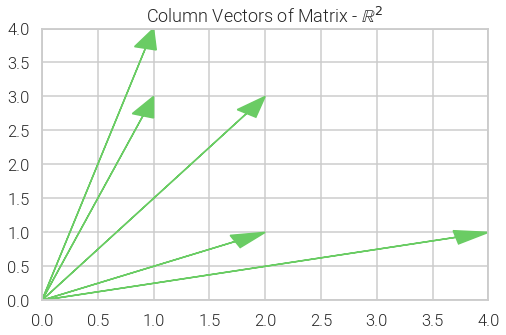

In [22]:
A = np.array([
    [2,4,2,1,1],
    [3,1,1,3,4]
])

figure = plt.figure(figsize=(8,5))
for x,y in zip(A[0],A[1]):
    plt.arrow(0,0,x,y, color='g',
              length_includes_head=True,
              head_width=0.2, head_length=0.3)
plt.title('Column Vectors of Matrix - $\mathbb{R}^2$')
plt.axis([0, max(A[0]), 0, max(A[1])])
plt.show()

Or they can be thought to be related, with each subsequent column vector existing in its current form only because the previous vector exists.

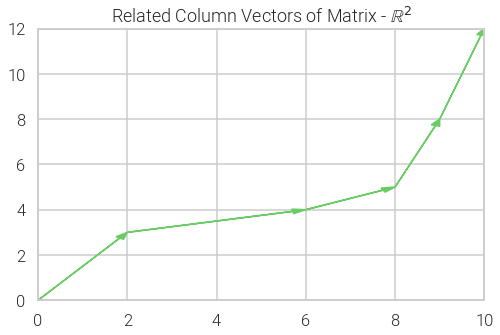

In [23]:
figure = plt.figure(figsize=(8,5))
origin = [0,0]
for x,y in zip(A[0],A[1]):
    plt.arrow(*origin,x,y, color='g',
              length_includes_head=True,
              head_width=0.2, head_length=0.3)
    origin[0] += x
    origin[1] += y
plt.title('Related Column Vectors of Matrix - $\mathbb{R}^2$')
plt.axis([0, sum(A[0]), 0, sum(A[1])])
plt.show()

It makes the most sense to view them as a combination of the previous two methods: points related to the origin. This form allows for some interesting geometric properties of matrices to be visualized.

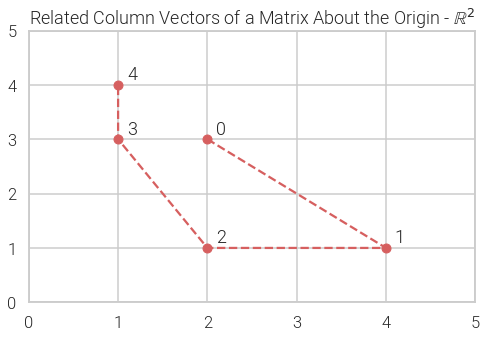

In [24]:
figure = plt.figure(figsize=(8,5))
xs, ys = A
plt.plot(xs, ys, 'ro--')
for i, xy in enumerate(zip(xs,ys)):
    x,y = xy[0]+0.1, xy[1]+0.1
    plt.text(x, y, i)
plt.title('Related Column Vectors of a Matrix About the Origin - $\\mathbb{R}^2$')
plt.axis([0, max(A[0])+1, 0, max(A[1])+1])
plt.show()

To truly visualize many of the geometric properties alluded to thus far, the matrix should be plotted as a polygon.

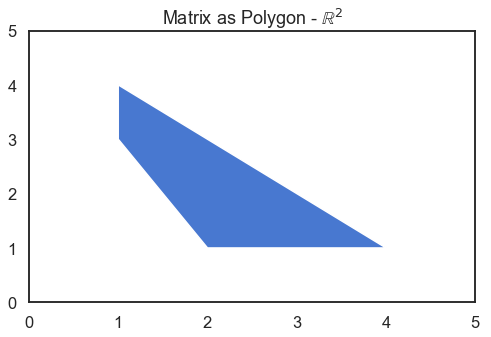

In [25]:
sns.set_style('white')
figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(patches.Polygon(A.T))
plt.title('Matrix as Polygon - $\\mathbb{R}^2$')
plt.axis([0, max(A[0])+1, 0, max(A[1])+1])
plt.show()

Just like with vectors, scalar multiplication results in a scaled version of the original polygon defined by the matrix.

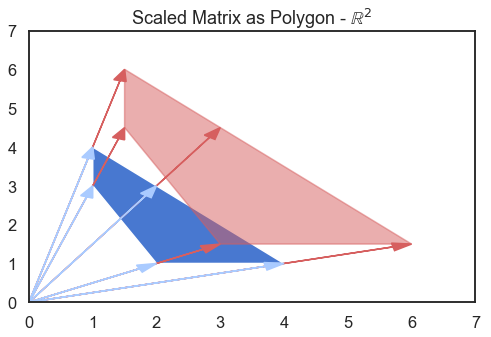

In [26]:
figure = plt.figure(figsize=(8,5))
scalar = 1.5
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon((scalar * A).T, color='r', alpha=0.5))
for x,y in zip(scalar*A[0],scalar*A[1]):
    plt.arrow(0,0,x,y, color='r',
              length_includes_head=True,
              head_width=0.2, head_length=0.3)
for x,y in zip(A[0],A[1]):
    plt.arrow(0,0,x,y, color='#aacbff',
              length_includes_head=True,
              head_width=0.2, head_length=0.3)
plt.title('Scaled Matrix as Polygon - $\\mathbb{R}^2$')
plt.axis([0, scalar*max(A[0])+1, 0, scalar*max(A[1])+1])
plt.show()

Also, just like with vectors, matrix projections can be found via matrix multiplication.

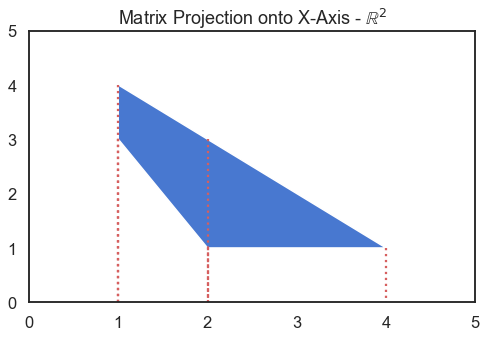

In [27]:
X = np.array([[1,0]])
A_x = np.array(X @ A)

figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(patches.Polygon(A.T))
for v,p in zip(A.T, A_x.T*X):
    plt.plot([v[0], p[0]], [v[1], p[1]], 'r:')
plt.title('Matrix Projection onto X-Axis - $\\mathbb{R}^2$')
plt.axis([0, max(A[0])+1, 0, max(A[1])+1])
plt.show()

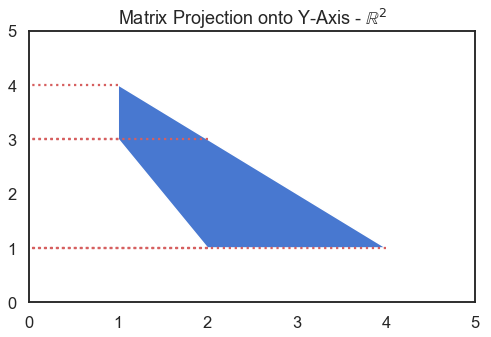

In [28]:
Y = np.array([[0,1]])
A_y = np.array(Y @ A)

figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(patches.Polygon(A.T))
for v,p in zip(A.T, A_y.T*Y):
    plt.plot([v[0], p[0]], [v[1], p[1]], 'r:')
plt.title('Matrix Projection onto Y-Axis - $\\mathbb{R}^2$')
plt.axis([0, max(A[0])+1, 0, max(A[1])+1])
plt.show()

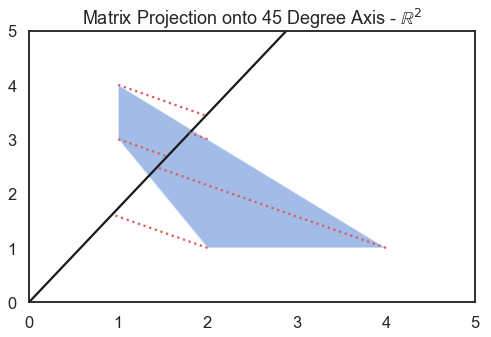

In [29]:
angle = 60 * np.pi / 180
XY_60 = np.array([[np.cos(angle),np.sin(angle)]])
A_60 = XY_60 @ A
line = (10*XY_60)[0]

figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(patches.Polygon(A.T, alpha=0.5))
plt.plot((0, line[0]), (0, line[1]), color='k')
for v,p in zip(A.T, A_60.T*XY_60):
    plt.plot([v[0], p[0]], [v[1], p[1]], 'r:')
plt.title('Matrix Projection onto 45 Degree Axis - $\\mathbb{R}^2$')
plt.axis([0, max(A[0])+1, 0, max(A[1])+1])
plt.show()

### Back to Rigid Euclidean Geometric Transformations
Only one rigid geometric transformation was demonstrated in the vectors notebook: Translations. Now that matrices have been introduced and a method of plotting/visualizing them has been established, all other rigid geometric transformations, Rotations, Reflections, and Glide Reflections, will be demonstrated.

#### Translations Revisited
Matrices can be translated via matrix addition. Adding a matrix with uniformly equal column vectors to another matrix results in a basic geometric translation.

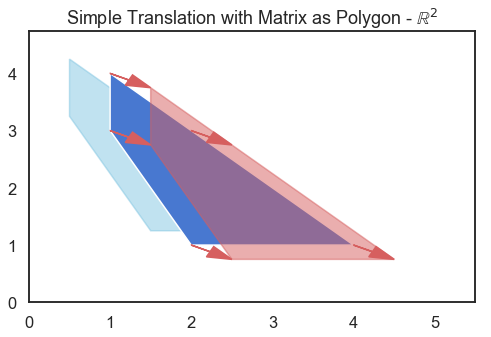

In [30]:
Uniform_M = np.array([
    [0.5]*5,
    [-0.25]*5,
])
Uniform_N = np.array([
    [-0.5],
    [0.25],
]) # demonstrates NumPy broadcasting of arrays

figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(patches.Polygon((Uniform_N + A).T, color='c', alpha=0.5))
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon((Uniform_M + A).T, color='r', alpha=0.5))
origin_x, origin_y = A
v_x, v_y = Uniform_M
for x,y,vx,vy in zip(origin_x,origin_y,v_x,v_y):
    plt.arrow(x, y, vx, vy, color='r',
              length_includes_head=True,
              head_width=0.2, head_length=0.3)
plt.title('Simple Translation with Matrix as Polygon - $\\mathbb{R}^2$')
plt.axis([0, max((Uniform_M+A)[0])+1, 0, max((Uniform_M+A)[1])+1])
plt.show()

Addition via a non-uniform vector results in a polygon in which each column vector is translated differently. It is still a geometric transformation, however, it is not a rigid Euclidean transformation, as the body defined by the resulting matrix is not the same as the original body (all points were not moved by the same distance).

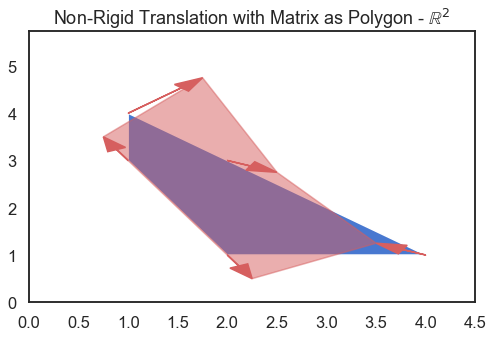

In [31]:
Non_Uniform = np.array([
    [0.5,-0.5,0.25,-0.25,0.75],
    [-0.25,0.25,-0.5,0.5,0.75],
])

figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon((Non_Uniform + A).T, color='r',
                                     alpha=0.5))
origin_x, origin_y = A
v_x, v_y = Non_Uniform
for x,y,vx,vy in zip(origin_x,origin_y,v_x,v_y):
    plt.arrow(x, y, vx, vy, color='r',
              length_includes_head=True,
              head_width=0.2, head_length=0.3)
plt.title('Non-Rigid Translation with Matrix as Polygon - $\\mathbb{R}^2$')
plt.axis([0, max((Non_Uniform+A)[0])+1, 0, max((Non_Uniform+A)[1])+1])
plt.show()

#### Rotations
Rotations to geometric shapes defined by matrices are achieved through matrix multiplication. The matrix to be rotated is multiplied a rotation matrix of the form
$
\left[\matrix{
\cos(\theta) & -\sin(\theta) \cr
\sin(\theta) & \cos(\theta)
}\right]
$
. The result is the original matrix shape rotated about the origin by whatever angle is specified.

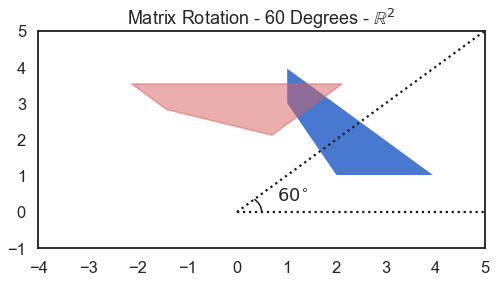

In [32]:
angle = np.pi / 4
XY_60 = np.array([[np.cos(angle),np.sin(angle)]])
Rot = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)],
])
line = (10*XY_60)[0]

figure = plt.figure(figsize=(8,4))
plt.plot([0]*10, 'k:')
plt.plot((0, line[0]), (0, line[1]), 'k:')
plt.gca().add_artist(patches.Arc((0,0), 1, 1, theta2=45, color='k'))
plt.text(0.8, 0.3, '$60^{\circ}$')
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon((Rot @ A).T, color='r',
                                     alpha=0.5))
plt.title('Matrix Rotation - 60 Degrees - $\\mathbb{R}^2$')
plt.axis([-4, 5, -1, 5])
plt.show()

#### Reflections
Reflections occur when a geometric body is reflected about an axis. It is very much like the body looking through a mirror.

They can be achieved in two ways. One is with a simple formula that adds onto the projection formula: $Ref=2{v\cdot l \over l\cdot l}l-v$ or $Ref=2Proj-v$.

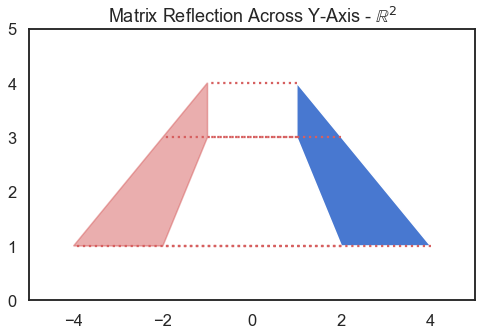

In [33]:
Y = np.array([[0,1]])
A_y = np.array(2* (Y @ A))

figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon((A_y.T*Y)-A.T, color='r', alpha=0.5))
for v,p in zip(A.T, (A_y.T*Y)-A.T):
    plt.plot([v[0], p[0]], [v[1], p[1]], 'r:')
plt.title('Matrix Reflection Across Y-Axis - $\\mathbb{R}^2$')
plt.axis([-5, 5, 0, 5])
plt.show()

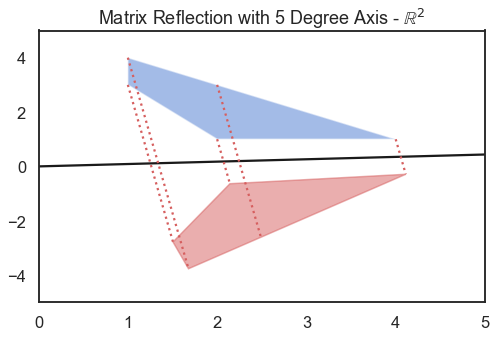

In [34]:
angle = 5 * np.pi / 180
XY_10 = np.array([[np.cos(angle),np.sin(angle)]])
A_10 = np.array(2 * (XY_10 @ A))
line = (10*XY_10)[0]

figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(patches.Polygon(A.T, alpha=0.5))
plt.gca().add_artist(patches.Polygon((A_10.T*XY_10)-A.T, color='r', alpha=0.5))
plt.plot((0, line[0]), (0, line[1]), color='k')
for v,p in zip(A.T, (A_10.T*XY_10)-A.T):
    plt.plot([v[0], p[0]], [v[1], p[1]], 'r:')
plt.title('Matrix Reflection with 5 Degree Axis - $\\mathbb{R}^2$')
plt.axis([0,5,-5,5])
plt.show()

Reflections are also possible via matrix multiplication with a reflection matrix of the form:
$
\left[\matrix{
\cos(2\theta) & \sin(2\theta) \cr
\sin(2\theta) & -\cos(2\theta)
}\right]
$.

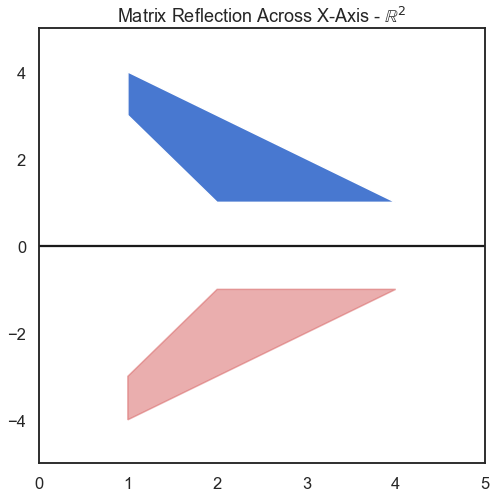

In [35]:
angle = 0
Ref = np.array([
    [np.cos(2*angle), np.sin(2*angle)],
    [np.sin(2*angle), -np.cos(2*angle)],
])

figure = plt.figure(figsize=(8,8))
plt.plot([0]*6, color='k')
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon((Ref @ A).T, color='r',
                                     alpha=0.5))
plt.title('Matrix Reflection Across X-Axis - $\\mathbb{R}^2$')
plt.axis([0, 5, -5, 5])
plt.show()

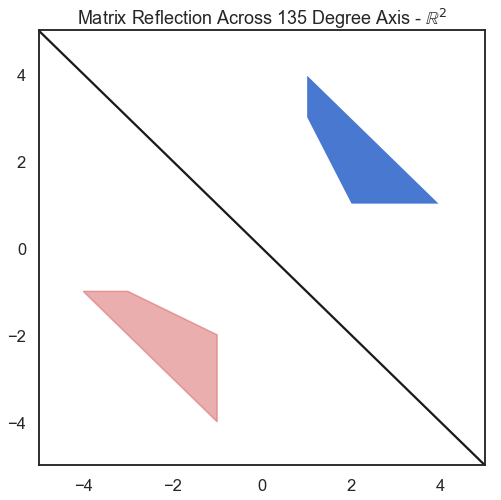

In [36]:
angle = -np.pi / 4
Ref = np.array([
    [np.cos(2*angle), np.sin(2*angle)],
    [np.sin(2*angle), -np.cos(2*angle)],
])

figure = plt.figure(figsize=(8,8))
plt.plot([-5,5], [5,-5], color='k')
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon((Ref @ A).T, color='r',
                                     alpha=0.5))
plt.title('Matrix Reflection Across 135 Degree Axis - $\\mathbb{R}^2$')
plt.axis([-5, 5, -5, 5])
plt.show()

#### Glide Reflections
Glide reflections are basically the combination of reflections and translations with a line. The body to be transformed is reflected across a line and translated along that same line. It can be, unsurprisingly, be achieved by combining methods of the two transformations to a single body.

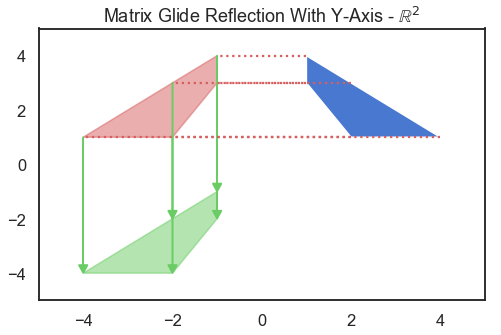

In [37]:
Y = np.array([[0,1]])
A_y = np.array(2* (Y @ A))
A_ref = (A_y.T*Y)-A.T
Translate = np.array([[0]*5,[-5]*5])

figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon(A_ref, color='r', alpha=0.5))
plt.gca().add_artist(patches.Polygon(A_ref+Translate.T, color='g', alpha=0.5))
for v,p in zip(A.T, (A_y.T*Y)-A.T):
    plt.plot([v[0], p[0]], [v[1], p[1]], 'r:')
origin_x, origin_y = A_ref.T
v_x, v_y = Translate
for x,y,vx,vy in zip(origin_x,origin_y,v_x,v_y):
    plt.arrow(x, y, vx, vy, color='g',
              length_includes_head=True,
              head_width=0.2, head_length=0.3)
plt.title('Matrix Glide Reflection With Y-Axis - $\\mathbb{R}^2$')
plt.axis([-5, 5, -5, 5])
plt.show()

### Additional Linear Transformations/Mapping/Functions
Linear transformations, including all those discussed up to this point, are mappings from one matrix to another. The matrix used to map the two matrices together is called a transformations matrix. Transformation matrices are essentially matrices of functions that transform whatever matrix is operated by it. This brings up a seldom mentioned idea related to mathematical functions. Functions are actually mappings from one set of numbers to another set of numbers.

Transformation matrices are applied by performing a matrix multiplication with the transformation matrix on the left and the matrix to be transformed on the right.

The linear matrix transformations already covered by linear mapping in this notebook are Rotation, Reflection, and Axis Projection. Now three more will be covered: Scaling, Shear Mapping, and Squeeze Mapping.

#### Scaling
One type of scaling was already covered (just multiplying by a scalar), but the same result can be achieved with a transformation matrix of the form:

$$
\left[\matrix{
s & 0 & \cdots & 0 \cr
0 & s & \cdots & 0 \cr
\vdots & \vdots & \ddots & \vdots \cr
0 & 0 & \cdots & s
}\right]
$$

This is essentially an Identity Matrix multiplied by a scalar.

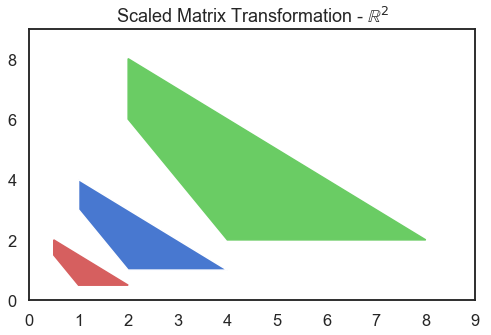

In [38]:
figure = plt.figure(figsize=(8,5))
S_up = np.array([
    [2,0],
    [0,2],
])
S_down = np.array([
    [0.5,0],
    [0,0.5],
])
plt.gca().add_artist(patches.Polygon((S_up @ A).T, color='g'))
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon((S_down @ A).T, color='r'))
plt.title('Scaled Matrix Transformation - $\\mathbb{R}^2$')
plt.axis([0, 9, 0, 9])
plt.show()

The main characteristic that makes this form of scaling different from scalar multiplication is that the 's' values in the scaling transformation matrix do not need to be equal. Non-equal 's' values result in directional scaling.

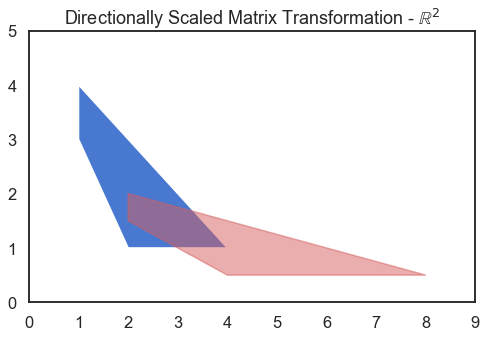

In [39]:
figure = plt.figure(figsize=(8,5))
S_dir = np.array([
    [2,0],
    [0,0.5],
])
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon((S_dir @ A).T, color='r', alpha=0.5))
plt.title('Directionally Scaled Matrix Transformation - $\\mathbb{R}^2$')
plt.axis([0, 9, 0, 5])
plt.show()

Interesting forms of scaling are stretching and compression, in which distances are changed in one direction but kept constant in others.

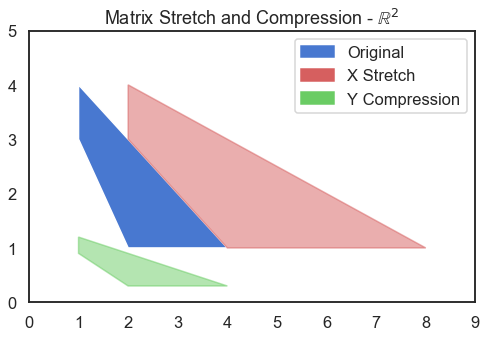

In [40]:
figure = plt.figure(figsize=(8,5))
SX = np.array([
    [2,0],
    [0,1],
])
CY = np.array([
    [1,0],
    [0,0.3],
])
plt.gca().add_artist(patches.Polygon(A.T))
plt.gca().add_artist(patches.Polygon((SX @ A).T, color='r', alpha=0.5))
plt.gca().add_artist(patches.Polygon((CY @ A).T, color='g', alpha=0.5))
plt.legend(handles=[
    patches.Patch(color=sns.color_palette()[0], label='Original'),
    patches.Patch(color=sns.color_palette()[3], label='X Stretch'),
    patches.Patch(color=sns.color_palette()[2], label='Y Compression')
], loc='upper right')
plt.title('Matrix Stretch and Compression - $\\mathbb{R}^2$')
plt.axis([0, 9, 0, 5])
plt.show()

#### Shear Mapping
Shear mapping displaces all points in a geometric body in a single direction that is based on the sign of point. Simple shear mappings are of the forms
$
\left[\matrix{
1 & k \cr
0 & 1
}\right]
$ for shears parallel to the x-axis and
$
\left[\matrix{
1 & 0 \cr
k & 1
}\right]
$ for shears parallel to the y-axis.

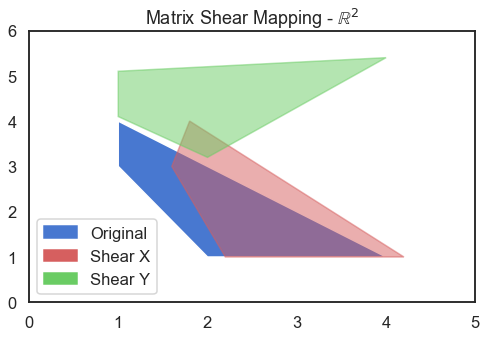

In [41]:
figure = plt.figure(figsize=(8,5))
SX = np.array([
    [1,0.2],
    [0,1],
])
SY = np.array([
    [1,0],
    [1.1,1],
])

plt.gca().add_artist(patches.Polygon(A.T, label='Original'))
plt.gca().add_artist(patches.Polygon((SX @ A).T, label='Shear X',
                                     color='r', alpha=0.5))
plt.gca().add_artist(patches.Polygon((SY @ A).T, label='Shear Y',
                                     color='g', alpha=0.5))
plt.legend(handles=[
    patches.Patch(color=sns.color_palette()[0], label='Original'),
    patches.Patch(color=sns.color_palette()[3], label='Shear X'),
    patches.Patch(color=sns.color_palette()[2], label='Shear Y')
], loc='lower left')
plt.title('Matrix Shear Mapping - $\\mathbb{R}^2$')
plt.axis([0, 5, 0, 6])
plt.show()

#### Squeeze Mapping
Squeeze Mapping can be achieved by performing two stretches with reciprocal values in the form of
$
\left[\matrix{
k & 0 \cr
0 & {1\over k}
}\right]
$. It essentially acts like a stretch and compression in one operation.

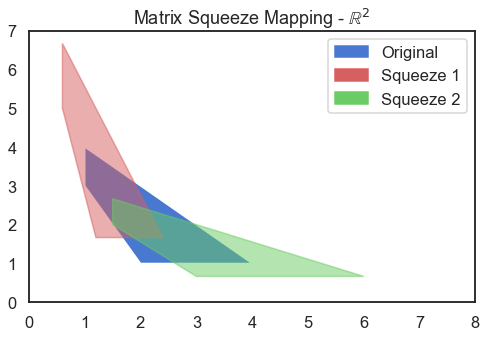

In [42]:
figure = plt.figure(figsize=(8,5))
S1 = np.array([
    [3/5,0],
    [0,5/3],
])
S2 = np.array([
    [3/2,0],
    [0,2/3],
])

plt.gca().add_artist(patches.Polygon(A.T, label='Original'))
plt.gca().add_artist(patches.Polygon((S1 @ A).T, label='Shear X',
                                     color='r', alpha=0.5))
plt.gca().add_artist(patches.Polygon((S2 @ A).T, label='Shear Y',
                                     color='g', alpha=0.5))
plt.legend(handles=[
    patches.Patch(color=sns.color_palette()[0], label='Original'),
    patches.Patch(color=sns.color_palette()[3], label='Squeeze 1'),
    patches.Patch(color=sns.color_palette()[2], label='Squeeze 2')
], loc='upper right')
plt.title('Matrix Squeeze Mapping - $\\mathbb{R}^2$')
plt.axis([0, 8, 0, 7])
plt.show()

#### The Unit Square
All the transformations demonstrated up to this point are very clear with the unit square.

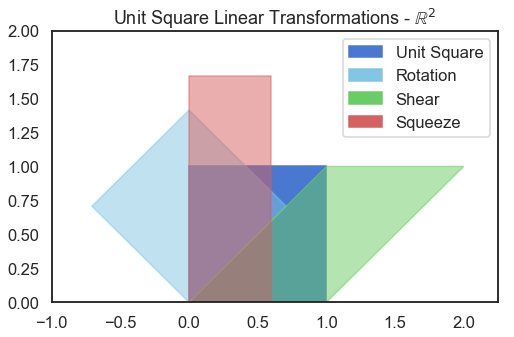

In [43]:
Square = np.array([
    [0,0,1,1],
    [0,1,1,0],
])
Rot = np.array([
    [np.cos(np.pi/4), -np.sin(np.pi/4)],
    [np.sin(np.pi/4), np.cos(np.pi/4)],
])
Shear = np.array([
    [1,1],
    [0,1],
])
Squeeze = np.array([
    [3/5,0],
    [0,5/3],
])

figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(patches.Polygon(Square.T, color='b'))
plt.gca().add_artist(patches.Polygon((Rot @ Square).T, color='c',
                                     alpha=0.5))
plt.gca().add_artist(patches.Polygon((Shear @ Square).T, color='g',
                                     alpha=0.5))
plt.gca().add_artist(patches.Polygon((Squeeze @ Square).T, color='r',
                                     alpha=0.5))
plt.legend(handles=[
    patches.Patch(color=sns.color_palette()[0], label='Unit Square'),
    patches.Patch(color=sns.color_palette()[9], label='Rotation'),
    patches.Patch(color=sns.color_palette()[2], label='Shear'),
    patches.Patch(color=sns.color_palette()[3], label='Squeeze')
], loc='upper right')
plt.title('Unit Square Linear Transformations - $\\mathbb{R}^2$')
plt.axis([-1, 2.25, 0, 2])
plt.show()

 # Inverse Matrices
 